<a href="https://colab.research.google.com/github/BasalamahZ/skripsi-machine-learning/blob/main/skripsi_wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update
!sudo apt-get install -y libsndfile1 -y
!pip install --upgrade pip
!sudo apt-get install portaudio19-dev -y

!pip install librosa keras tensorflow SpeechRecognition pyaudio ipywebrtc soundfile PyWavelets
!pip install --upgrade librosa

!sudo apt install ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,582 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,307 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security

In [ ]:
!pip install PyWavelets
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm_notebook

import soundfile as sf
import shutil

import pywt

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Frame Low**

In [ ]:
AudioSPH = "/content/drive/MyDrive/Colab Notebooks/SPH Low/"
LowDF= "data_path_low.csv"
HighDF= "data_path_high.csv"

audio_directory_list = os.listdir(AudioSPH)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("LowStress")
    file_path.append(AudioSPH + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'LowStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_path_low.csv",index=False)
shutil.move("data_path_low.csv", LowDF)

df = pd.read_csv(LowDF)
data_path.head()

,Emotions,Path
0,LowStress,/content/drive/MyDrive/Colab Notebooks/SPH Low...
1,LowStress,/content/drive/MyDrive/Colab Notebooks/SPH Low...
2,LowStress,/content/drive/MyDrive/Colab Notebooks/SPH Low...
3,LowStress,/content/drive/MyDrive/Colab Notebooks/SPH Low...
4,LowStress,/content/drive/MyDrive/Colab Notebooks/SPH Low...


# **Data Frame High**

In [ ]:
AudioSPH = "/content/drive/MyDrive/Colab Notebooks/SPH High/"
audio_directory_list = os.listdir(AudioSPH)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("HighStress")
    file_path.append(AudioSPH + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'HighStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_path_high.csv",index=False)
shutil.move("data_path_high.csv", HighDF)

df = pd.read_csv(HighDF)
data_path.head()

,Emotions,Path
0,HighStress,/content/drive/MyDrive/Colab Notebooks/SPH Hig...
1,HighStress,/content/drive/MyDrive/Colab Notebooks/SPH Hig...
2,HighStress,/content/drive/MyDrive/Colab Notebooks/SPH Hig...
3,HighStress,/content/drive/MyDrive/Colab Notebooks/SPH Hig...
4,HighStress,/content/drive/MyDrive/Colab Notebooks/SPH Hig...


Showing dataset calculation

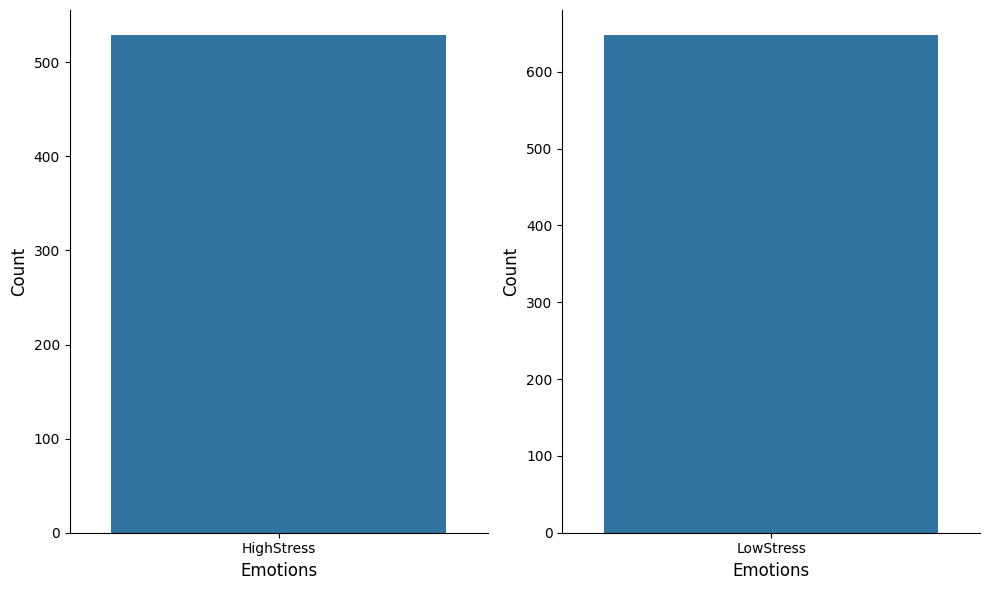

In [ ]:
#load from csv
dflow = pd.read_csv(LowDF)
dfhigh = pd.read_csv(HighDF)

# Plotting
plt.figure(1, figsize=(10, 6))  # Adjust the figsize as needed
plt.title('Count of Emotions', size=16)

plt.subplot(1, 2, 1)  # Subplot for dfhigh
sns.countplot(data=dfhigh, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

plt.subplot(1, 2, 2)  # Subplot for dflow
sns.countplot(data=dflow, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# **MFCC Feature Extraction**

This prepare_data function will execute and prepare data with
- adding offsett/pading
- extract with mfcc
- sr=8000, n_mfcc=40

In [ ]:
audio_length=8000 * 1
dim = (60, 1 + int(np.floor(audio_length/512)), 1)

def prepare_data(fnames):
    X = np.empty(shape=(len(fnames), dim[0], dim[1], 1))
    input_length = audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        data, _ = librosa.core.load(fname, sr=8000, res_type="kaiser_fast")
        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")


        # # Pre-Emphasis
        # pre_emphasis = 0.97
        # emphasized_signal = np.append(data[0], data[1:] - pre_emphasis * data[:-1])

        # # Framing
        # frame_size = 0.025
        # frame_stride = 0.01
        # frame_length, frame_step = frame_size * input_length, frame_stride * input_length

        # signal_length = len(emphasized_signal)
        # frame_length = int(round(frame_length))
        # frame_step = int(round(frame_step))
        # num_frames = int(np.ceil(float(np.abs(signal_length - frame_length))/ frame_step))

        # pad_signal_length = num_frames * frame_step + frame_length
        # z = np.zeros((pad_signal_length - signal_length))
        # pad_signal =  np.append(emphasized_signal, z)

        # indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        # frames = pad_signal[indices.astype(np.int32, copy=False)]

        # # Windowing using Hamming Window
        # frames *= np.hamming(frame_length)

        # # FFT (Fast Fourier Transform)
        # NFFT = 512
        # magnitude_frames = np.absolute(np.fft.rfft(frames, NFFT))
        # power_frames = ((1.0 / NFFT) * ((magnitude_frames)** 2))

        # # Mel Filter-Bank
        # nfilt = 60
        # mel_filters = mel_filterbank(nfilt, NFFT, audio_length)
        # filter_banks = np.dot(power_frames, mel_filters.T)
        # filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
        # filter_banks = 20 * np.log10(filter_banks)

        # # Discrete Cosine Transform (DCT)
        # mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (60 + 1)]

        # cep_lifter = 22
        # nframes, ncoeff = mfcc.shape[-2:]
        # n = np.arange(ncoeff)
        # lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
        # mfcc *= lift  #*

        # #Mean Normalization
        # filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
        # mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
        # mfcc_reshaped = np.transpose(mfcc, (1, 2, 0))
        # data = librosa.feature.mfcc(y=data, sr=8000, n_mfcc=60, window='hamming')
        # data = np.expand_dims(mfcc_reshaped, axis=-1)
        # print(data.shape, "data")

        # X[i,] = mfcc


        # data = np.pad(data, (1, 1), "constant")
        data = librosa.feature.mfcc(y=data, sr=8000, n_mfcc=60)
        data = np.expand_dims(mfcc, axis=-1)
        X[i,] = data
        # X=data
    return X

# **MFCC Feature Extraction & Wavelet Transform**

This prepare_data function will execute and prepare data with
- adding offsett/pading
- extract with mfcc
- combine mfcc with wavelet transform
- merge the feature extraction to one array
- sr=8000, n_mfcc=40

In [ ]:
from pathlib import WindowsPath
audio_length=8000 * 1
dim_wavelet = (60, 1 + int(np.floor(audio_length/512)), 1)

# Mean Absolute Deviation
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

# Denoise the raw signal given a segment x
def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per", level=level)
    sigma = (1/0.6745) * maddest(coeff[-1])  # Menggunakan koefisien terakhir dari dekomposisi
    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

def prepare_data2(fnames):
    X = np.empty(shape=(len(fnames), dim_wavelet[0], dim_wavelet[1], 1))
    input_length = audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        data, _ = librosa.core.load(fname, sr=8000, res_type="kaiser_fast")
        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = denoise_signal(x=data)
        data = librosa.feature.mfcc(y=data, sr=8000, n_mfcc=60, window='hamming')
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
        # X=data
    return X

In [ ]:
from pathlib import WindowsPath
from scipy.fftpack import dct
audio_length=8000 * 1
dim_wavelet = (60, 1 + int(np.floor(audio_length/512)), 1)

def hz_to_mel(hz):
    return 2595 * np.log10(1+hz/700)

def mel_to_hz(mel):
    return 700* (10 ** (mel / 2595) - 1)

def mel_filterbank(nfilt, NFFT, sample_rate):
    fmin = 0
    fmax = sample_rate / 2
    mel_min = hz_to_mel(fmin)
    mel_max = hz_to_mel (fmax)

    mel_points = np.linspace(mel_min, mel_max, nfilt + 2)
    hz_points = mel_to_hz(mel_points)
    bin_points = np.floor((NFFT + 1) * hz_points / sample_rate).astype(int)

    # Filter signal
    filters = np.zeros ((nfilt, NFFT // 2 + 1))
    for i in range(1, nfilt + 1):
        filters[i - 1, bin_points[i - 1]:bin_points[i]] = (np.arange(bin_points[i - 1], bin_points[i]) - bin_points[
            i - 1]) / (bin_points[i] - bin_points[i - 1])
        filters[i - 1, bin_points[i]:bin_points[i + 1]] = 1 - (
            np.arange(bin_points[i], bin_points[i + 1]) - bin_points[i]) / (bin_points[i + 1] - bin_points[i])
    return filters


def prepare_data3(fnames):
    X = np.empty(shape=(len(fnames), dim_wavelet[0], dim_wavelet[1], 2))
    input_length = audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        data, _ = librosa.core.load(fname, sr=8000, res_type="kaiser_fast")
        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        # Pre-Emphasis
        pre_emphasis = 0.97
        emphasized_signal = np.append(data[0], data[1:] - pre_emphasis * data[:-1])

        # Framing
        frame_size = 0.025
        frame_stride = 0.01
        frame_length, frame_step = frame_size * input_length, frame_stride * input_length

        signal_length = len(emphasized_signal)
        frame_length = int(round(frame_length))
        frame_step = int(round(frame_step))
        num_frames = int(np.ceil(float(np.abs(signal_length - frame_length))/ frame_step))

        pad_signal_length = num_frames * frame_step + frame_length
        z = np.zeros((pad_signal_length - signal_length))
        pad_signal =  np.append(emphasized_signal, z)

        indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]

        # Windowing using Hamming Window
        frames *= np.hamming(frame_length)

        # Use wavelet transform instead of FFT
        coeff = pywt.wavedec(frames, "db4", level=1, mode="symmetric")
        # sigma = (1/0.6745) * np.mean(np.absolute(coeff[-1] - np.mean(coeff[-1]))) # Menggunakan koefisien terakhir dari dekomposisi
        # uthresh = sigma * np.sqrt(2*np.log(len(frames)))
        # coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

        # Calculate wavelet_num by considering the sum of lengths of coeff[0] and coeff[1]
        wavelet_num = 204
        # Mel Filter-Bank
        nfilt = 16
        mel_filters = mel_filterbank(nfilt, wavelet_num, input_length)
        filter_banks = np.dot(coeff, mel_filters.T)
        filter_banks = np.where(filter_banks <= 0, np.finfo(float).eps, filter_banks)
        filter_banks = 20 * np.log10(filter_banks)

        # Discrete Cosine Transform (DCT)
        mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (60 + 1)]

        cep_lifter = 22
        nframes, ncoeff = mfcc.shape[-2:]
        n = np.arange(ncoeff)
        lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
        mfcc *= lift  #*

        #Mean Normalization
        filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
        mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
        mfcc_reshaped = np.transpose(mfcc, (1, 2, 0))
        # data = librosa.feature.mfcc(y=data, sr=8000, n_mfcc=60, window='hamming')
        # data = np.expand_dims(mfcc_reshaped, axis=-1)
        # print(data.shape, "data")

        X[i,] = mfcc_reshaped
        # X=data
    return X

# **Merge All Dataset**

Because the data preparation had been done with separate folder for low and high stress, we need to merge into one csv

In [ ]:
merged_df = pd.concat([dflow, dfhigh], ignore_index=True)
merged_df.to_csv('merged_data.csv', index=False)

Prepare 1 without SPEC

# **Data prepartion before trained**

This code use prepare_data function with only **MFCC** as feature extraction.
The dimension or return value is:
- X_train: (886, 40, 16, 1)
- Y_train: (886, 2)

In [ ]:
X = merged_df['Path'].values
Y = merged_df['Emotions'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
print(x_train.shape)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

encoder.fit(y_test)
y_test = encoder.transform(y_test)

# prepare data
X_test = prepare_data(x_test)
Y_test = to_categorical(y_test, num_classes=2)

X_train = prepare_data(x_train)
print(X_train.shape)
Y_train = to_categorical(y_train, num_classes=2)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# THIS IS THE READY VARIABLE FOR TRAINED
x_train_with_mfcc = X_train
x_test_with_mfcc = X_test
y_train_with_mfcc = Y_train
y_test_with_mfcc = Y_test

print(X_train.shape, Y_train.shape)


(882,)


  0%|          | 0/295 [00:00<?, ?it/s]

ValueError: could not broadcast input array from shape (98,59,1) into shape (60,16,1)

# **Data prepartion before trained**

This code use prepare_data2 function with **MFCC** and **Wavelet Transform** as feature extraction.
The dimension or return value is:
- X_train: (886, 40, 16, 2)
- Y_train: (886, 2)

In [ ]:
X = merged_df['Path'].values
Y = merged_df['Emotions'].values

encoder = OneHotEncoder()
# Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
print(y_train[2], 'x shape')

x_train_df=pd.DataFrame(x_train, columns=['path'])
x_train_df.to_csv('x_train.csv', index=False)

x_test_df=pd.DataFrame(x_test, columns=['path'])
x_test_df.to_csv('x_test.csv', index=False)

# Create DataFrames for Y_train and Y_test
y_train_df = pd.DataFrame(y_train, columns=['label'])
y_test_df = pd.DataFrame(y_test, columns=['label'])

# Save DataFrames to CSV files
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

encoder.fit(y_test)
y_test = encoder.transform(y_test)

# prepare data
X_test = prepare_data2(x_test)
Y_test = to_categorical(y_test, num_classes=2)

X_train = prepare_data2(x_train)
Y_train = to_categorical(y_train, num_classes=2)

# THIS IS THE READY VARIABLE FOR TRAINED
x_train_with_wavelet = X_train
x_test_with_wavelet = X_test
y_train_with_wavelet = Y_train
y_test_with_wavelet = Y_test
print(X_train.shape, Y_train.shape)

LowStress x shape


  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

(882, 60, 16, 1) (882, 2)


# **Model 2D with CNN**

Note that in input function we will receive the input dimension wether it is 1/2
- 1, if we only use mfcc in prepartion step
- 2, if we use both mfcc and spectral centroid

In [ ]:
from keras import Sequential
from keras.utils import Sequence, to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import Dense, Dropout, Input, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Flatten, Conv2D
from sklearn.metrics import confusion_matrix

def get_2d_conv_model(input_dimension):

    nclass = 2

    #change the dim from 1 to 2
    inp = Input(shape=(dim_wavelet[0],dim_wavelet[1], input_dimension))
    x = Convolution2D(32, kernel_size=5, padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Convolution2D(32*2, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)

    x = Convolution2D(32*3, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Convolution2D(32*3, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Flatten()(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    out = Dense(nclass, activation=softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = optimizers.Adam(0.0001)

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model



### THIS IS THE READY VARIABLE FOR TRAINED (MFCC)
- x_train_with_mfcc = X_train
- x_test_with_mfcc = X_test
- y_train_with_mfcc = Y_train
- y_test_with_mfcc = Y_test

### THIS IS THE READY VARIABLE FOR TRAINED (MFCC & SPEC)
- x_train_with_spec = X_train
- x_test_with_spec = X_test
- y_train_with_spec = Y_train
- y_test_with_spec = Y_test

### THIS IS THE READY VARIABLE FOR TRAINED (MFCC & Wavelet)
- x_train_with_wavelet = X_train
- x_test_with_wavelet = X_test
- y_train_with_wavelet = Y_train
- y_test_with_wavelet = Y_test

# **Model 2D with CNN (only MFCC)**


In [ ]:
model_mfcc = get_2d_conv_model(1)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)

history = model_mfcc.fit(x_train_with_mfcc, y_train_with_mfcc,
                    validation_data=(x_test_with_mfcc, y_test_with_mfcc),
                    batch_size=32,
                    callbacks=[rlrp],
                    epochs=40)

Epoch 1/40


ValueError: ignored

# **Model 2D with CNN (MFCC & Wavelet)**


In [ ]:
model_wavelet = get_2d_conv_model(1)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
print(x_train_with_wavelet.shape)
print(y_train_with_wavelet.shape)
print(x_test_with_wavelet.shape)
print(y_test_with_wavelet.shape)
history = model_wavelet.fit(x_train_with_wavelet, y_train_with_wavelet,
                    validation_data=(x_test_with_wavelet, y_test_with_wavelet),
                    batch_size=32,
                    callbacks=[rlrp],
                    epochs=40)

(882, 60, 16, 1)
(882, 2)
(295, 60, 16, 1)
(295, 2)
Epoch 1/40
28/28 [==============================] - 8s 188ms/step - loss: 0.5372 - acc: 0.7517 - val_loss: 0.6169 - val_acc: 0.6712 - lr: 1.0000e-04
Epoch 2/40
28/28 [==============================] - 5s 173ms/step - loss: 0.3590 - acc: 0.8469 - val_loss: 0.5385 - val_acc: 0.7593 - lr: 1.0000e-04
Epoch 3/40
28/28 [==============================] - 8s 277ms/step - loss: 0.2758 - acc: 0.8923 - val_loss: 0.4895 - val_acc: 0.8237 - lr: 1.0000e-04
Epoch 4/40
28/28 [==============================] - 5s 183ms/step - loss: 0.2213 - acc: 0.9184 - val_loss: 0.4700 - val_acc: 0.7966 - lr: 1.0000e-04
Epoch 5/40
28/28 [==============================] - 5s 187ms/step - loss: 0.1859 - acc: 0.9399 - val_loss: 0.4490 - val_acc: 0.8034 - lr: 1.0000e-04
Epoch 6/40
28/28 [==============================] - 7s 259ms/step - loss: 0.1337 - acc: 0.9683 - val_loss: 0.5378 - val_acc: 0.7356 - lr: 1.0000e-04
Epoch 7/40
28/28 [==============================] - 5s

# **Accuracy Training Data**

In [ ]:
def check_accuracy(X_test, Y_test, model):
  print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

  epochs = [i for i in range(40)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['acc']
  train_loss = history.history['loss']
  test_acc = history.history['val_acc']
  test_loss = history.history['val_loss']

  fig.set_size_inches(20,6)
  ax[0].plot(epochs , train_loss , label = 'Training Loss')
  ax[0].plot(epochs , test_loss , label = 'Testing Loss')
  ax[0].set_title('Training & Testing Loss')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")

  ax[1].plot(epochs , train_acc , label = 'Training acc')
  ax[1].plot(epochs , test_acc , label = 'Testing acc')
  ax[1].set_title('Training & Testing acc')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  plt.show()

# **Accuracy Training Data**

Check Accuracy with Only MFCC: 83%

10/10 [==============================] - 1s 118ms/step - loss: 0.5072 - acc: 0.8136
Accuracy of our model on test data :  81.35592937469482 %


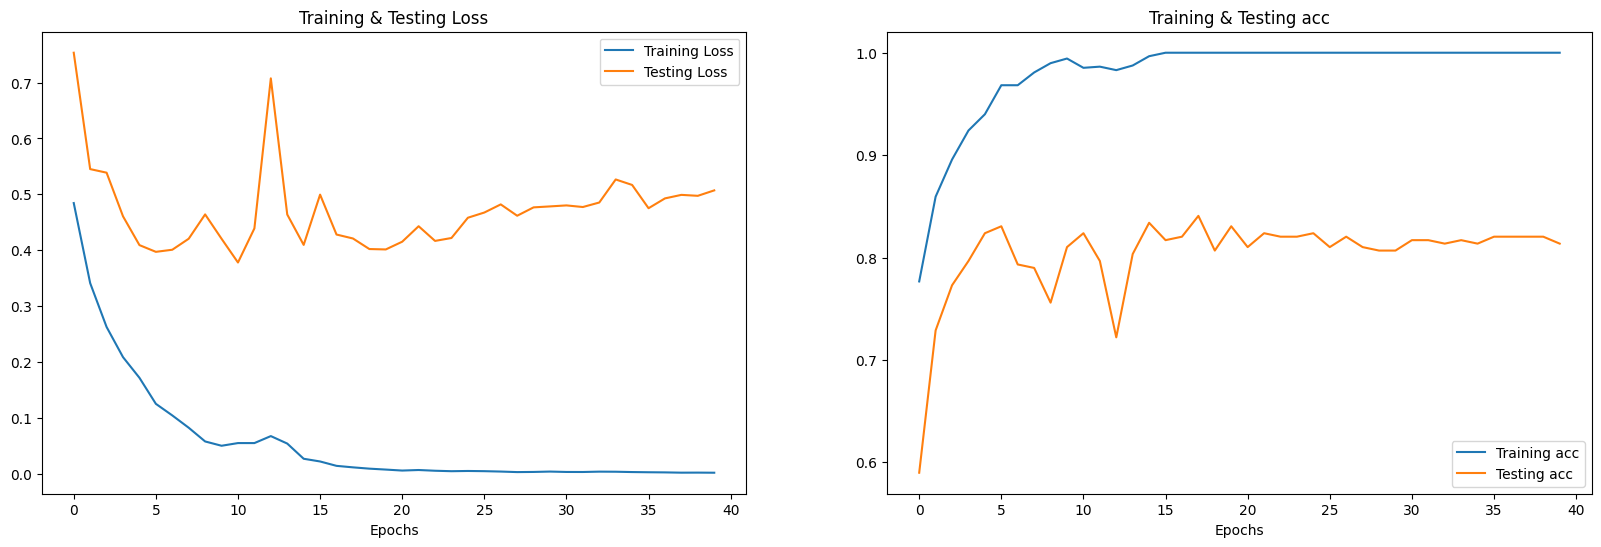

In [ ]:
check_accuracy(x_test_with_wavelet, y_test_with_wavelet, model_wavelet)

10/10 [==============================] - 1s 95ms/step - loss: 0.3252 - acc: 0.8721
Accuracy of our model on test data :  87.2053861618042 %


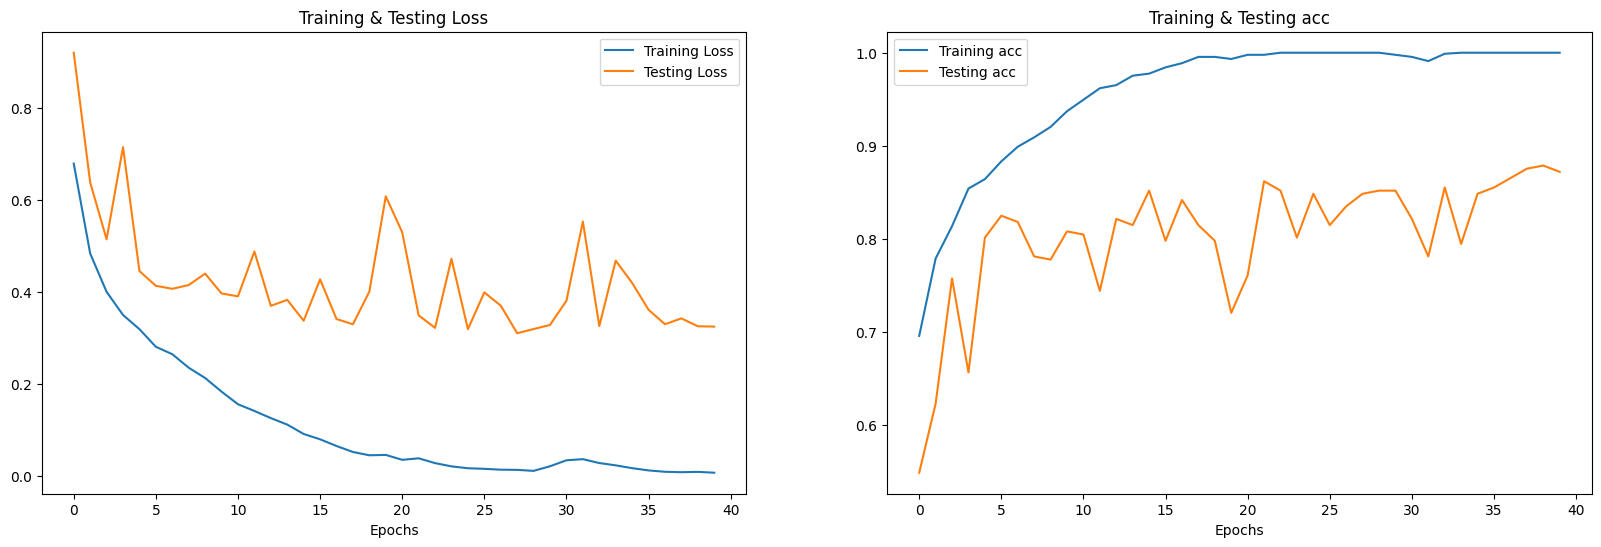

In [ ]:
check_accuracy(x_test_with_mfcc, y_test_with_mfcc, model_mfcc)

check_accuracy(x_test_with_mfcc, y_test_with_mfcc)

In [ ]:
import wave

predict_high_data_path = "/content/drive/MyDrive/Colab Notebooks/SPH High/mark2_m2_angry.sph"
predict_low_data_path = "/content/drive/MyDrive/Colab Notebooks/SPH Low/stand2_m3_low.sph"

random_data_path = "/content/drive/MyDrive/Colab Notebooks/data/Random Data/output_ravdess_calm.wav"



y, sr = librosa.load(predict_high_data_path, sr=24000)

# Resample to 8000 Hz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)
output_path = "file_resampled.wav"
sf.write(output_path, y_resampled, 8000)

wav = wave.open(output_path)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

predict_data = prepare_data3([output_path])
predict_data = model_wavelet.predict(predict_data, use_multiprocessing=True, workers=6, verbose=1)
predicted_labels = encoder.inverse_transform([np.argmax(predict_data)])

print(predict_data)
print(predicted_labels)
encoder.fit(y_train)
y_train = encoder.transform(y_train)

Sampling (frame) rate =  8000
Total samples (frames) =  2688
Duration =  0.336


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 112ms/step
[[9.999112e-01 8.879461e-05]]
[0]


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,LowStress,0
1,LowStress,1
2,HighStress,0
3,HighStress,0
4,LowStress,1
5,LowStress,1
6,HighStress,0
7,LowStress,1
8,HighStress,0
9,HighStress,0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
# cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

TypeError: ignored

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  HighStress       0.84      0.80      0.82       134
   LowStress       0.84      0.88      0.86       163

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297



In [ ]:
# model_spec.save("/content/drive/MyDrive/Colab Notebooks/data/Model/model_spec_galih.h5")
# model_mfcc.save("/content/drive/MyDrive/Colab Notebooks/data/Model/model_mfcc_galih.h5")
model_wavelet.save("/content/drive/MyDrive/Colab Notebooks/Model/model_wavelet_zidane.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1= Sequential()
model1.add(Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(dim[0], dim[1], 2)))
model1.add(MaxPooling2D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=5, strides = 2, padding = 'same'))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=32, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(units=2, activation='softmax'))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model1.summary()

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
history = model1.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=32,
                    callbacks=[rlrp],
                    epochs=40)

Epoch 1/40
28/28 [==============================] - 73s 3s/step - loss: 14.8199 - accuracy: 0.5023 - val_loss: 0.6899 - val_accuracy: 0.5946 - lr: 0.0010
Epoch 2/40
28/28 [==============================] - 53s 2s/step - loss: 0.6937 - accuracy: 0.5248 - val_loss: 0.6619 - val_accuracy: 0.6554 - lr: 0.0010
Epoch 3/40
28/28 [==============================] - 50s 2s/step - loss: 0.6184 - accuracy: 0.6614 - val_loss: 0.5513 - val_accuracy: 0.7635 - lr: 0.0010
Epoch 4/40
28/28 [==============================] - 56s 2s/step - loss: 0.6100 - accuracy: 0.6727 - val_loss: 0.5261 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 5/40
28/28 [==============================] - 55s 2s/step - loss: 0.5671 - accuracy: 0.7178 - val_loss: 0.4879 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 6/40
28/28 [==============================] - 54s 2s/step - loss: 0.5197 - accuracy: 0.7449 - val_loss: 0.4171 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 7/40
28/28 [==============================] - 53s 2s/step - loss: 0.4859 - 

In [ ]:
AudioSPH = "/content/drive/MyDrive/Colab Notebooks/data/SPH Low" #Disesuaikan untuk directory
AudioWAV = "/content/drive/MyDrive/Colab Notebooks/data/WAV Low"

import soundfile as sf
import os

# Create the destination folder if it doesn't exist
if not os.path.exists(AudioWAV):
    os.makedirs(AudioWAV)

# Recursively search for .sph files in nested folders
for root, _, files in os.walk(AudioSPH):
  # print(files)
    for filename in files:
        if filename.endswith('.sph'):
            input_path = os.path.join(root, filename)

            # Get the relative path within the source folder
            rel_path = os.path.relpath(root, AudioSPH)

            # Create a folder name for the destination folder
            # dest_folder_name = rel_path.replace(os.path.sep, '-')

            output_filename = f'{os.path.splitext(filename)[0]}.wav'
            output_path = os.path.join(AudioWAV, output_filename)
            # print(output_path)
            # Convert SPH to WAV using soundfile
            sph_data, sample_rate = sf.read(input_path)
            sf.write(output_path, sph_data, sample_rate)

print("Conversion completed.")

Conversion completed.
